<a href="https://colab.research.google.com/github/Luseat/Data-mining/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update
!apt-get install -y xvfb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import filedialog

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,241 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64

In [ ]:
# Fungsi untuk memeriksa dataset
def periksa_dataset(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))

    print("Distribusi kelas:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} gambar")

# Periksa dataset
dataset_path = '/content/drive/My Drive/dataset/'  # Ganti dengan path dataset Anda
periksa_dataset(dataset_path)

Distribusi kelas:
Apel: 20 gambar
Jeruk: 20 gambar


In [ ]:
# Persiapan data
print("Menyiapkan data...")
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Menyiapkan data...
Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
# Membangun model
print("Membangun model CNN...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

# Melatih model
print("Memulai pelatihan model...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, reduce_lr]
)

Membangun model CNN...
Memulai pelatihan model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4062 - loss: 0.7090 - val_accuracy: 0.5000 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7078 - val_accuracy: 0.5000 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 0.6839 - val_accuracy: 0.6250 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.6859 - val_accuracy: 0.5000 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6846 - learning_rate: 0.0010
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6250 - loss: 0.6673 - val_accuracy:

Mengevaluasi model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Confusion Matrix:
[[3 1]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

        Apel       0.75      0.75      0.75         4
       Jeruk       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



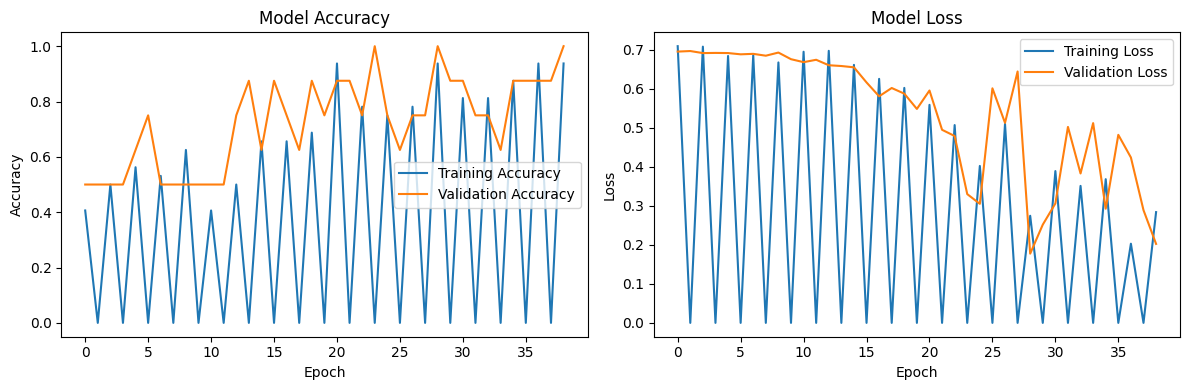

In [ ]:
# Fungsi evaluasi model
def evaluasi_detil(model, generator):
    predictions = model.predict(generator)
    y_pred = (predictions > 0.5).astype("int32")
    y_true = generator.classes

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Apel', 'Jeruk']))

# Evaluasi model
print("Mengevaluasi model...")
evaluasi_detil(model, validation_generator)

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan model
model.save('model_klasifikasi_apel_jeruk.h5')
print("Model telah disimpan sebagai 'model_klasifikasi_apel_jeruk.h5'")

Model telah disimpan sebagai 'model_klasifikasi_apel_jeruk.h5'


In [ ]:

import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
# Ensure you have a function `tebak_buah` and a model `model` defined elsewhere in your code
# Fungsi untuk memilih gambar dan menampilkan hasil
def pilih_dan_prediksi():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img.thumbnail((300, 300))  # Resize gambar untuk ditampilkan
        photo = ImageTk.PhotoImage(img)
        image_label.config(image=photo)
        image_label.image = photo

        jenis_buah, kepercayaan = tebak_buah(model, img)
        result_label.config(text=f"Prediksi: {jenis_buah}\nKepercayaan: {kepercayaan:.2f}")

# Membuat GUI
root = tk.Tk()
root.title("Klasifikasi Buah")

select_button = tk.Button(root, text="Pilih Gambar", command=pilih_dan_prediksi)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack()

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

root.mainloop()


TclError: no display name and no $DISPLAY environment variable